In [50]:
import pandas as pd
import re
import time
import numpy as np
import itertools


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import csv 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")


In [51]:
class dictionary(dict):
    """
    Extends python dictionary in order to have
    index --> word
    but also
    word --> index
    """
    def __init__(self):
        super(dictionary, self).__init__()
        self.index = {}
        self.size = 0
    
    def __setitem__(self, key, value):
        super(dictionary, self).__setitem__(key, value)
        self.index[value] = key
        self.size += 1
    
    def __delitem__(self, key):
        value = super().pop(key)
        ignore = self.index.pop(value)
        self.size -=1

In [52]:
def process_corpus(corpus, context_size, dictionary, fixed_dictionary=False):
    list_of_points = []
    for document in corpus:
        list_of_points += process_document(document, context_size, dictionary, fixed_dictionary)
    return list_of_points


def process_document(document, context_size, dictionary, fixed_dictionary=False):
    text = document.lower()
    p = re.compile("[a-z]+")
    tokens = p.findall(text)
    list_of_points = []
    for i in range(len(tokens) - context_size + 1):
        data_point = [0 for l in range(context_size)]
        add_new_data_point = True
        for j in range(context_size):
            k = i+j
            if tokens[k] not in dictionary.index:
                if fixed_dictionary:
                    # only takes series of words in the dictionary
                    add_new_data_point = False
                    break
                else:
                    new_Ix = dictionary.size
                    dictionary[new_Ix] = tokens[k]
            data_point[j] = dictionary.index[tokens[k]]
        if add_new_data_point:
            list_of_points.append(tuple(data_point))
    return list_of_points
        


In [53]:
# Define some important values
CONTEXT_SIZE = 4
DICT_SIZE = 17000

### For the arXiv corpus

In [54]:
data = pd.read_csv("./arxiv_articles.csv", sep="|",header=1)
s = time.time()
mydict = dictionary()
dataset = process_corpus(data['summary'], CONTEXT_SIZE, mydict)
t = time.time() - s
print("Done in {} seconds".format(int(t)))

Done in 11 seconds


In [55]:
mydict.size

64515

In [56]:
len(dataset)

5447489

In [57]:
dataset[:10]

[(0, 1, 2, 3),
 (1, 2, 3, 4),
 (2, 3, 4, 5),
 (3, 4, 5, 6),
 (4, 5, 6, 7),
 (5, 6, 7, 8),
 (6, 7, 8, 9),
 (7, 8, 9, 10),
 (8, 9, 10, 11),
 (9, 10, 11, 12)]

In [58]:
data_df = pd.DataFrame(dataset)

In [59]:
data_df.head()

,0,1,2,3
0,0,1,2,3
1,1,2,3,4
2,2,3,4,5
3,3,4,5,6
4,4,5,6,7


In [60]:
# Count the number of occurrences for each word
word_counts = data_df.iloc[:, 0].value_counts()
word_counts

30       371927
14       241963
49       146379
11       136600
68       120327
          ...  
40063         1
35965         1
42447         1
48251         1
63425         1
Name: 0, Length: 63202, dtype: int64

In [61]:
print("These are the most frequent words: {}".format((mydict[314], mydict[5], mydict[49], mydict[11])))

These are the most frequent words: ('algebras', 'countable', 'and', 'a')


In [62]:
# Now, we want to keep only a subset of all the words
# we define a fixed size for the dictionary and we 
# keep the words, starting from the most frequent ones

words2keep = word_counts.keys()[:DICT_SIZE]

In [63]:
words2keep

Int64Index([   30,    14,    49,    11,    68,    22,     0,    19,    64,
                2,
            ...
            55667, 37971, 22882, 18427, 41792, 25705,  6781, 14941, 25061,
            45905],
           dtype='int64', length=17000)

In [64]:
# Now, we create a new dictionary with the
# words selected in the previous step
new_dictionary = dictionary()
for i in range(len(words2keep)):
    new_dictionary[i] = mydict[words2keep[i]]
    



In [65]:
# With the new dictionary, build the new training dataset

# Creating the training dataset using series of 4 words 
# appearing in the text
s = time.time()
new_dataset = process_corpus(data['summary'], CONTEXT_SIZE, new_dictionary, fixed_dictionary=True)
t = time.time() - s
print("Done in {} seconds".format(int(t)))

Done in 11 seconds


In [66]:
len(new_dataset)

5056387

In [67]:
new_dictionary.size

17000

In [68]:
new_dataset[:10]

[(6, 34, 9, 1229),
 (34, 9, 1229, 2101),
 (9, 1229, 2101, 9555),
 (1229, 2101, 9555, 1457),
 (2101, 9555, 1457, 2214),
 (9555, 1457, 2214, 790),
 (1457, 2214, 790, 757),
 (2214, 790, 757, 14),
 (790, 757, 14, 3),
 (757, 14, 3, 347)]

In [69]:
data['summary'][0]

'We show that every essentially countable orbit equivalence relation induced by a continuous action of a Polish group on a Polish space is $\\sigma$-lacunary. In combination with [Invent. Math.201 (1), 309-383, 2015] we obtain a straightforward proof of the result from [Adv. Math.307, 312-343,2017] that every essentially countable equivalence relation that is induced by an action of abelian non-archimedean Polish group is essentially hyperfinite.'

In [70]:
print(new_dictionary[6], new_dictionary[34], new_dictionary[9], new_dictionary[1229])

we show that every


In [71]:
new_dictionary

{0: 'the',
 1: 'of',
 2: 'and',
 3: 'a',
 4: 'to',
 5: 'in',
 6: 'we',
 7: 'is',
 8: 'for',
 9: 'that',
 10: 'with',
 11: 'this',
 12: 'on',
 13: 'are',
 14: 'by',
 15: 'as',
 16: 'an',
 17: 'model',
 18: 'be',
 19: 'from',
 20: 'which',
 21: 'data',
 22: 'can',
 23: 'our',
 24: 'it',
 25: 'at',
 26: 'time',
 27: 'based',
 28: 'these',
 29: 'models',
 30: 'or',
 31: 'using',
 32: 'have',
 33: 'results',
 34: 'show',
 35: 'two',
 36: 'method',
 37: 'between',
 38: 'paper',
 39: 'also',
 40: 'such',
 41: 's',
 42: 'has',
 43: 'not',
 44: 'new',
 45: 'their',
 46: 'study',
 47: 'one',
 48: 'analysis',
 49: 'used',
 50: 'approach',
 51: 'high',
 52: 'its',
 53: 'distribution',
 54: 'methods',
 55: 'problem',
 56: 'different',
 57: 'present',
 58: 'more',
 59: 'both',
 60: 'when',
 61: 'been',
 62: 'than',
 63: 'well',
 64: 'large',
 65: 'number',
 66: 'system',
 67: 'non',
 68: 'function',
 69: 'use',
 70: 'proposed',
 71: 'algorithm',
 72: 'but',
 73: 'process',
 74: 'some',
 75: 'where',

In [72]:
A=np.array(new_dataset)

X=A[:,0:3]
Y=A[:,3]

In [73]:
X.shape

(5056387, 3)

## Réseau

In [74]:
np.random.seed(0)
import Neuralword as Neur
from Neuralword import ilogit
dict_size=new_dictionary.size
nb_features=100
h=100

In [75]:
N=Neur.Network([Neur.Project_and_concat(nb_features,dict_size),
                Neur.Dense(3*nb_features,h),Neur.tanh(),Neur.Dense(h,dict_size)])

N_a=Neur.Network([N,Neur.Ilogit_and_KL(Y)])

In [76]:
def accuracy(x, y):
        Z=ilogit(N.forward(x))
        y_preds = np.argmax(Z, axis=0)
        y_real= np.argmax(y.T, axis=0)
        acc = np.mean(y_preds == y_real)
        return acc 

In [77]:
Z=N.forward(X)
#print(np.shape(Z))
#print(np.shape(X))
#print(Y.shape)
#print(dict_size)

#y_preds = np.argmax(Z, axis=0)
#print(y_preds)
#print(Z)

MemoryError: Unable to allocate 11.3 GiB for an array with shape (300, 5056387) and data type float64

In [40]:
A=np.zeros((Y.shape[0],dict_size))

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if j==Y[i]:
            A[i,j]=1

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,A,test_size=0.2) 

In [42]:
print(np.shape(X_train))
print(np.shape(Y_train))

(336, 3)
(336, 238)


In [48]:
theta=np.random.randn(N.nb_params)
N.set_params(theta)
acc=[]
loss=[]
epochs=np.arange(1,50,1)
#choix d'un pas
dt=0.01/15
batchsize=50
n_batch=int(X_train.shape[0]/batchsize)+1
for i in epochs:
   # print("epoch{}".format(i))
    for j in range(0,n_batch):
        Xbatch=X_train[j*batchsize:min((j+1)*batchsize,X_train.shape[0])]
        Ybatch=Y_train[j*batchsize:min((j+1)*batchsize,X_train.shape[0])]
        N_a=Neur.Network([N,Neur.Ilogit_and_KL(Ybatch.T)])
        deltaY=N_a.forward(Xbatch)
        grad=N_a.backward(None)[0]
        theta=theta-dt*grad
        N_a.set_params(theta)
        N.set_params(theta)
    acc.append(accuracy(X_train,Y_train))
    N_a=Neur.Network([N,Neur.Ilogit_and_KL(Y_train.T)])
    loss.append(N_a.forward(X_train))
    #if i%40==0:
        #plot_N(N)
        #print("-----------------")
    #print(loss[-1])
print("fin")

fin


0.24107142857142858


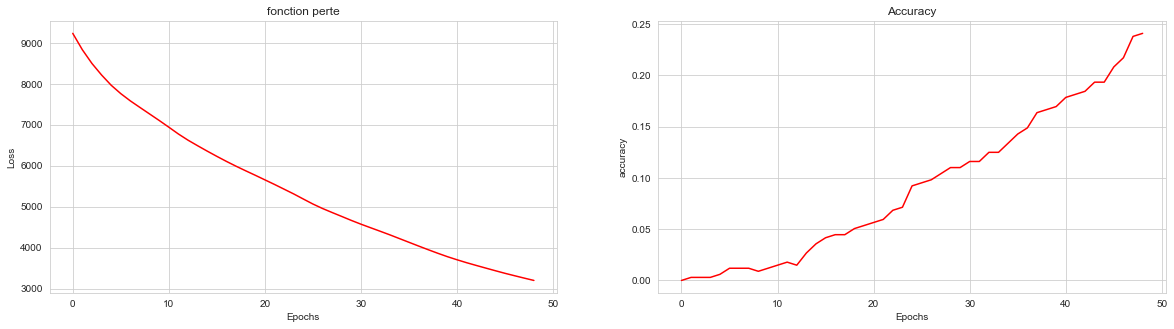

In [49]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss,color='r')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("fonction perte");
ax = fig.add_subplot(1,2,2)
ax.plot(acc,color='r')
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
ax.set_title("Accuracy");

#Z=ilogit(N.forward(X_train))
#y_preds = np.argmax(Z, axis=0)
#y_real= np.argmax(yt, axis=0)

print(acc[-1])

### For the ASRS corpus

In [23]:
#data_ASRS = pd.read_csv("./ASRS_data.csv", sep="|")

In [24]:
#data_ASRS['Narrative'][0]

In [25]:
#s = time.time()
#mydict_ASRS = dictionary()
#dataset_ASRS = process_corpus(data_ASRS['Narrative'], CONTEXT_SIZE, mydict_ASRS)
#t = time.time() - s
#print("Done in {} seconds".format(int(t)))